In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
data=mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [0]:
(x_train,y_train),(x_test,y_test)=data

In [0]:
type(data)

tuple

In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
len(data[0][1])

60000

In [0]:
dir(data)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [0]:
assert(x_train.shape[0]==y_train.shape[0]),'The number of images is not equal to '
assert(x_train.shape[1:]==(28,28)),'the dimensions of the images are 28'
assert(x_test.shape[0]==y_test.shape[0]),"the number of images is not equal to"
assert(x_test.shape[1:]==(28,28)),"the dimensions of images are not"

In [0]:
assert(x_train.shape[1:]==(28,28))

In [0]:
print((x_train.shape[1:]))
y_train.shape

(28, 28)


(60000,)

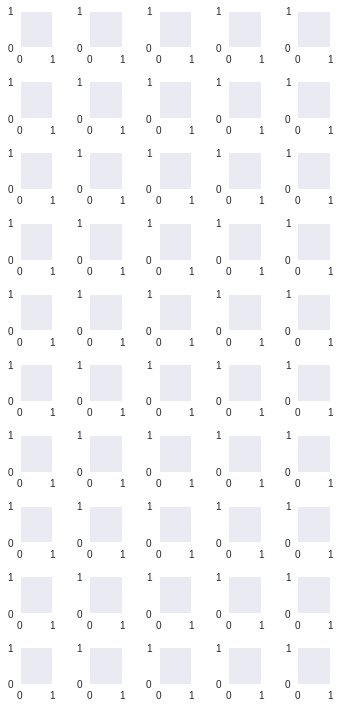

In [0]:
num_of_samples=[]
cols=5
num_classes=10
g,axis=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
plt.tight_layout()

In [0]:
x_train[0].shape

(28, 28)

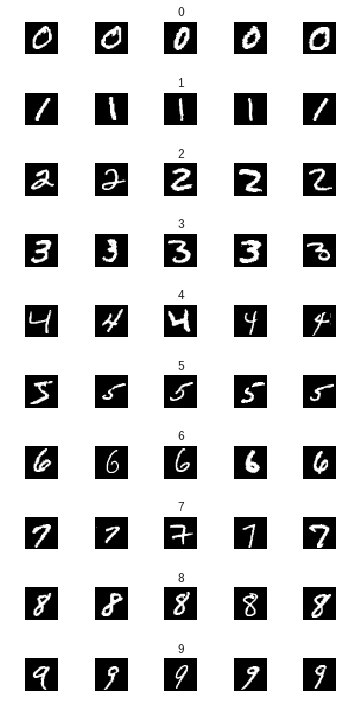

In [0]:
num_of_samples=[]
cols=5
num_classes=10
g,axis=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
plt.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    axis[j][i].imshow(x_selected[i,:,:],cmap=plt.get_cmap('gray'))
    axis[j][i].axis('off')
    if i==2:
      axis[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

In [0]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [0]:
(x_train[y_train==1]).shape

(6742, 28, 28)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


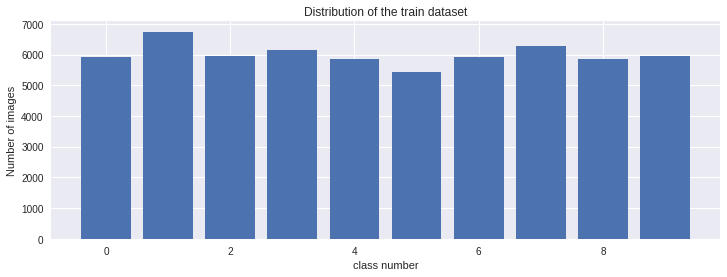

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title('Distribution of the train dataset')
plt.xlabel("class number")
plt.ylabel('Number of images')
plt.show()

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [0]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
lenet=le_net()
lenet.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)      

In [0]:
history=lenet.fit(x_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 118us/step - loss: 0.2401 - acc: 0.9229 - val_loss: 0.0485 - val_acc: 0.9845
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0760 - acc: 0.9768 - val_loss: 0.0433 - val_acc: 0.9870
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0601 - acc: 0.9812 - val_loss: 0.0339 - val_acc: 0.9903
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0545 - acc: 0.9830 - val_loss: 0.0353 - val_acc: 0.9893
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0488 - acc: 0.9856 - val_loss: 0.0390 - val_acc: 0.9880
Epoch 6/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0482 - acc: 0.9847 - val_loss: 0.0331 - val_acc: 0.9908
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0

Text(0.5, 0, 'epoch')

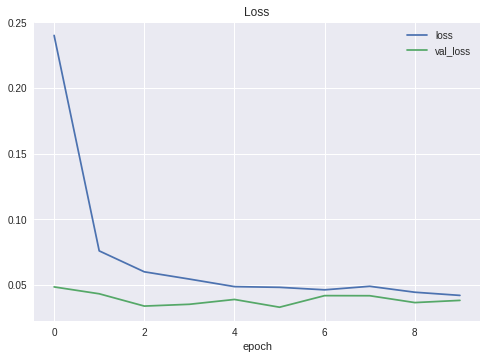

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

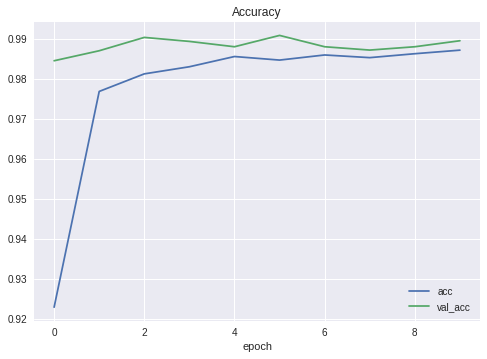

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

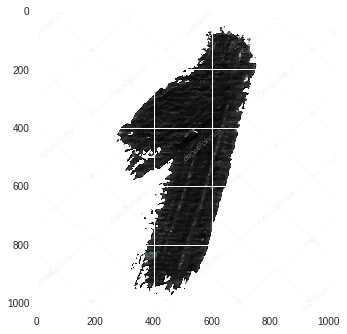

In [0]:
import requests
from PIL import Image
url="https://st.depositphotos.com/2899123/3753/v/950/depositphotos_37531843-stock-illustration-1-black-handwritten-number-on.jpg"
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)

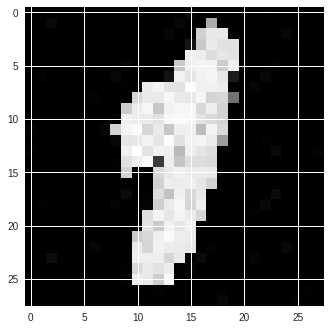

In [0]:
import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(28,28))
gray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [0]:

img.size

(1024, 1024)

In [0]:
image=image/255
#print(image)
image=image.reshape(1,28,28,1)

In [0]:
lenet.predict_classes(image)

array([7])